## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [1]:
#pip install seaborn

In [2]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
#import seaborn 
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

C:\Users\Han Bing\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x3a610f0>,
 'caps': [<matplotlib.lines.Line2D at 0xc173748>,
 'fliers': [<matplotlib.lines.Line2D at 0xc1867f0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc186278>,
 'whiskers': [<matplotlib.lines.Line2D at 0xc11ec18>,
  <matplotlib.lines.Line2D at 0xc1e55c0>]}

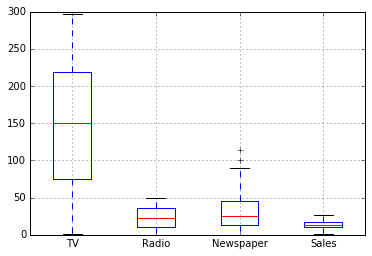

In [3]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

In [4]:
#plt.scatter(Fill_this_in)

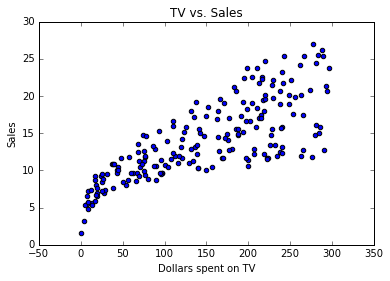

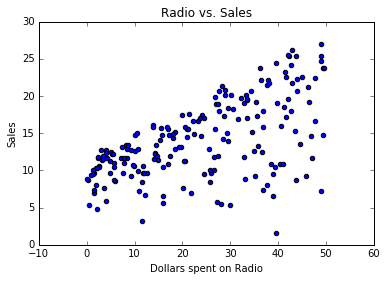

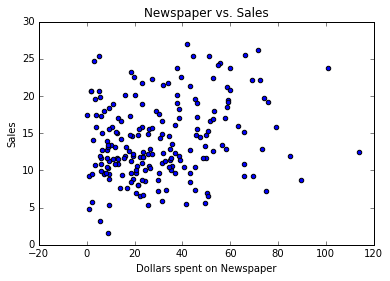

In [5]:
from pandas.tools.plotting import scatter_matrix 

TV = df['TV']
Radio = df['Radio']
Newspaper =df ['Newspaper']
Sales = df['Sales']

#scatter plots of the advertising dollars spent on TV to the total Sales dollars gained
plt.title('TV vs. Sales')
plt.scatter(TV, Sales)
plt.xlabel('Dollars spent on TV')
plt.ylabel('Sales')
plt.show()

#scatter plots of the advertising dollars spent on Radio to the total Sales dollars gained
plt.title('Radio vs. Sales')
plt.scatter(Radio, Sales)
plt.xlabel('Dollars spent on Radio')
plt.ylabel('Sales')
plt.show()

#scatter plots of the advertising dollars spent on Newspaper to the total Sales dollars gained
plt.title('Newspaper vs. Sales')
plt.scatter(Newspaper, Sales)
plt.xlabel('Dollars spent on Newspaper')
plt.ylabel('Sales')
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

$Solution:$

From the plot above, since as advertising dollars spent on TV and Radio increases, the value of Sales increases, we can clearly observe that TV and newspaper are correlated with Sales. And since the points on the scatter plot of Newspaper to Sales are kind of messed up, we can say dollars spent on Newspaper are not correlated with Sales.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [6]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [7]:
y = df['Sales']

b) Set X to be just the features described above in df

In [8]:
X = df[['TV','Radio','Newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [9]:
Train = df.sample(frac = 0.8) #split df into 2 parts, 80% for training set
Test = df.loc[~df.index.isin(Train.index)] #20% for test set
# assign training set and test set to X and y
X_train = Train[['TV','Radio','Newspaper']]
X_test = Test[['TV','Radio','Newspaper']]
y_train = Train['Sales']
y_test = Test['Sales']

d) Train model on training data, and make predictions on testing data

In [10]:
import numpy as np
# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)
#Make predictions on testing data
predict_test = regr.predict(X_test)
print 'Predictions on testing data:'
print predict_test

Predictions on testing data:
[ 12.19255648   7.0924839    8.95066609  12.51589341  23.30507375
  18.17514622  15.04489543   9.11272007  21.82737042   9.78036335
  21.87253311   8.72549059  15.25095243  19.8389786   21.18630062
  11.48019454   9.79463677  11.38817529  11.54755288  11.58108465
  14.96543493  14.07214805  13.94468891  15.89819266  11.26973806
   9.92608691  12.08348538  18.64902157  10.08278529  13.40403715
  20.141931    12.33320811  16.38784742  12.5683541   24.16943296
  17.17301875  18.99657185   5.42506591  23.81519782  15.47546207]


e) Evalute the R^2 on training data. Is this good? Bad? Why?

In [11]:
# Explained variance score: 1 is perfect prediction
SSreg = np.mean((predict_test - y_test) ** 2)
SStot =  np.mean((y_test - np.mean(y_test)) ** 2)
R_squared = 1 - SSreg/SStot
print('R squared: %.2f' % R_squared)

R squared: 0.88


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

<function matplotlib.pyplot.show>

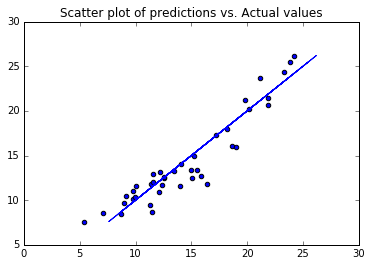

In [12]:
plt.title('Scatter plot of predictions vs. Actual values')
plt.scatter(predict_test, y_test)
plt.plot(y_test, y_test)
plt.show

$Solution:$

From the scatter plot above, we can infer that most prediction values are quite close to the actual values. Though there are some unideal predictions which are a little bit far from the actual values, we can still make a conclusion based on most cases that this model is a good model. 

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

$Solution:$

Before measuring the importance of features in the model, we should check if we have standarized the data, which means shifting the distribution of each attribute to have a mean of zero and a standard deviation of one. If the data hasn't been standarized, we will get the wrong answer as following, which is contradictory with the scatter plots we got before.

In [13]:
# Calculate the coefficients of the model (unnormalized)
coefficient = regr.coef_
print('Coefficients: TV, Radio, Newspaper', coefficient)

('Coefficients: TV, Radio, Newspaper', array([ 0.04715575,  0.18202952, -0.00293168]))


Next, we can standarize the data and see how the result goes.

In [14]:
from sklearn import preprocessing
#Standarized the training data
standarized_X_train = preprocessing.scale(X_train)
standarized_y_train = preprocessing.scale(y_train)
#Do regression 
regr = LinearRegression()
regr.fit(standarized_X_train , standarized_y_train)

coefficient_standarized = regr.coef_
print('Standarized coefficients: TV, Radio, Newspaper', coefficient_standarized)

('Standarized coefficients: TV, Radio, Newspaper', array([ 0.75038676,  0.51482957, -0.01145276]))


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

$Solution:$

We can interpret the result based on the coefficients of all variables. As we know, the closer the absolute value of coefficient to 1, the  more we can make sure there is a relationship between the corresponding coefficient and Sales. From the standarized result, we can see that the absolute values of coefficients of 'TV','Radio','Newspaper' are 0.75592536,  0.56269793, 0.02173997 ,respectively. So, we can conclude that 'TV' is the most correlated variable, and 'Newspaper' is the least correlated. In addition, based on the sign of the coefficients, we can infer if the variable is positively correlated or negatively correlated with Sales. So, in this question, 'TV' and 'Radio' are positively correlated and 'Newspaper' are negatively correlated.

And as for what we should have done to measure the importance of the features involved, we should standarized the dataset before we do the linear regression.
    

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

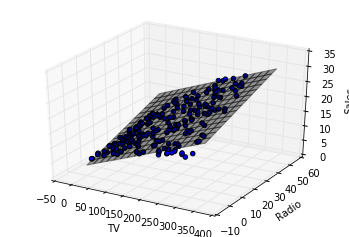

In [15]:
# Type your answer here. 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from matplotlib import cm

model = sm.ols(formula='Sales ~ TV + Radio', data = df)
fit = model.fit()

fit.summary()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generate a mesh
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'Radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(df['TV'], df['Radio'], df['Sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

$Solution:$

We can do the 3-D plot based on 'TV', 'Radio' and 'Sales'. Observing from the plot above, we can infer that it is a pretty good regression, most data points lie on the hyperplane. And since the coefficient of 'Newspaper' we got before is pretty small, we can choose to eliminate 'Newspaper' for this model. And in order to strengthen the model, we can add more variables related to 'TV','Radio', like:'$TV^2$', '$Radio^2$', '$TV*Radio$' or something like that.

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0294936154471, m = 1.47000284261, error = 112.848039257


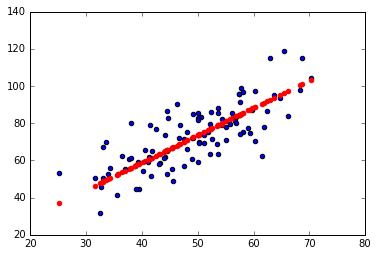

In [16]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    #learning rate = 0.00001/0.0001/0.001
    learning_rate = 0.00001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 70 iterations b = 0.0286769950994, m = 1.43763002474, error = 116.89890105


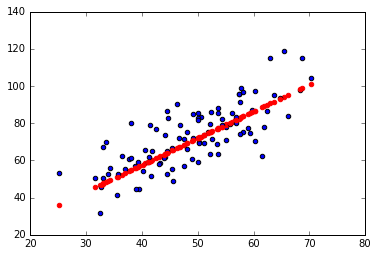

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 71 iterations b = 0.0287234429376, m = 1.439687363, error = 116.485973943


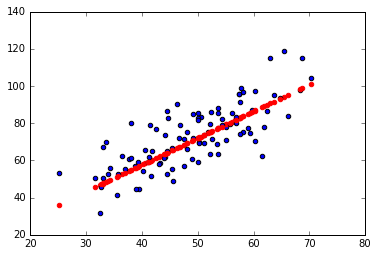

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 72 iterations b = 0.0287678753695, m = 1.44164216078, error = 116.113180136


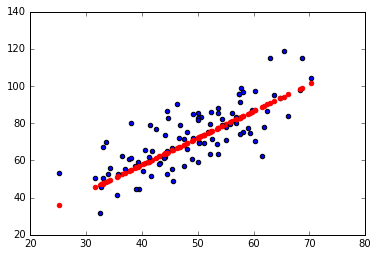

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 73 iterations b = 0.0288103928396, m = 1.44349952855, error = 115.77661895


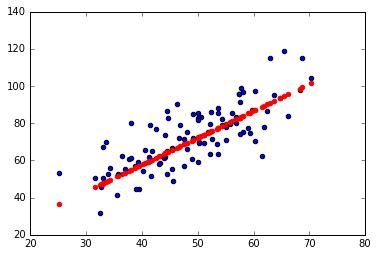

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 74 iterations b = 0.0288510907865, m = 1.44526432206, error = 115.472768827


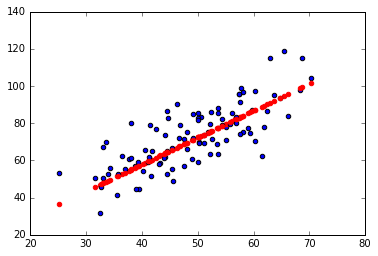

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 75 iterations b = 0.0288900598921, m = 1.44694115508, error = 115.198450477


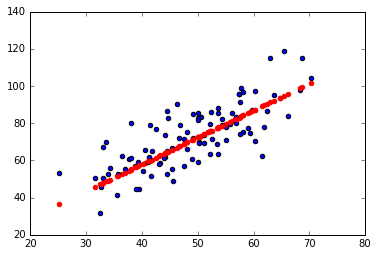

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 76 iterations b = 0.0289273863191, m = 1.44853441142, error = 114.950793617


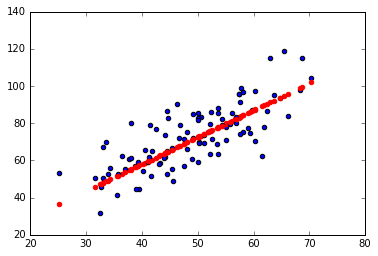

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 77 iterations b = 0.0289631519357, m = 1.45004825642, error = 114.727206936


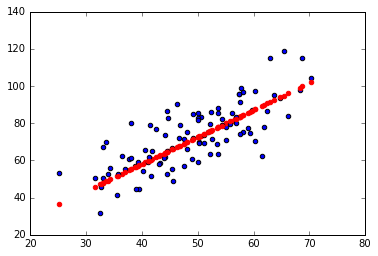

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 78 iterations b = 0.0289974345303, m = 1.45148664782, error = 114.525350978


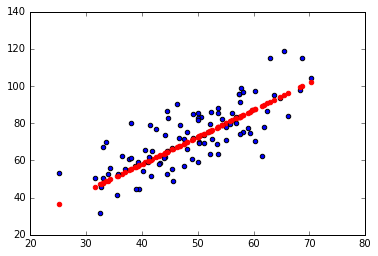

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 79 iterations b = 0.0290303080141, m = 1.45285334611, error = 114.343113669


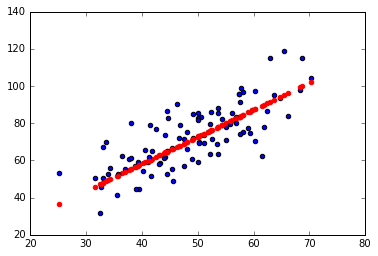

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 80 iterations b = 0.0290618426147, m = 1.45415192436, error = 114.178588211


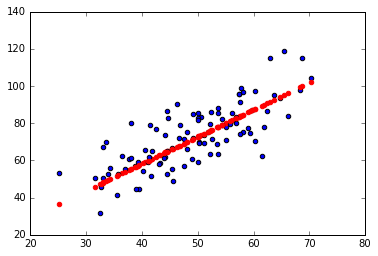

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 81 iterations b = 0.02909210506, m = 1.45538577757, error = 114.030053135


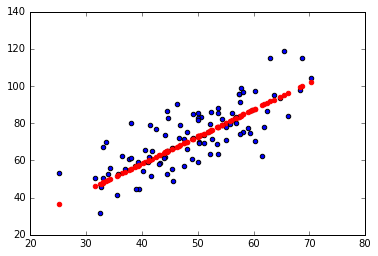

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 82 iterations b = 0.0291211587518, m = 1.45655813154, error = 113.895954288


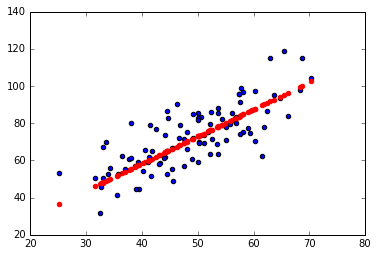

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 83 iterations b = 0.0291490639324, m = 1.4576720513, error = 113.774888567


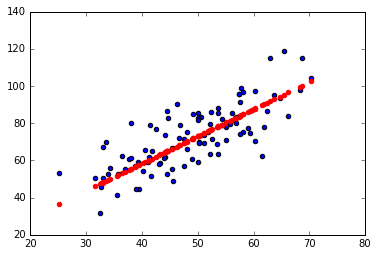

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 84 iterations b = 0.0291758778417, m = 1.45873044911, error = 113.665589244


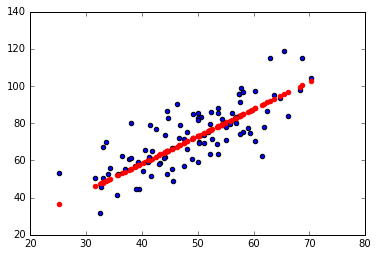

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 85 iterations b = 0.0292016548667, m = 1.45973609212, error = 113.566912706


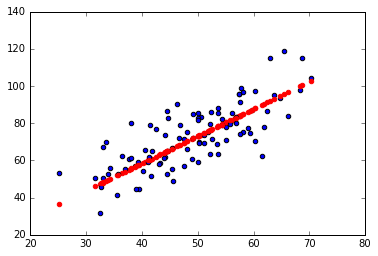

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 86 iterations b = 0.0292264466838, m = 1.46069160952, error = 113.477826492


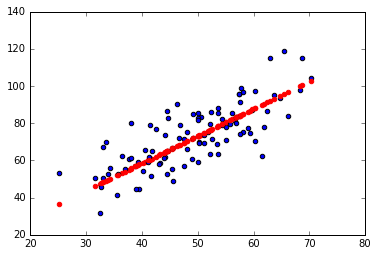

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 87 iterations b = 0.0292503023942, m = 1.46159949952, error = 113.39739849


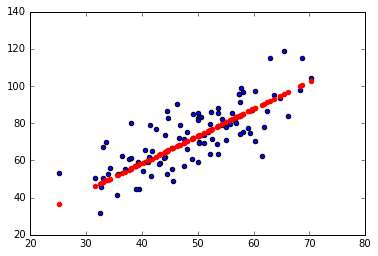

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 88 iterations b = 0.0292732686516, m = 1.46246213579, error = 113.32478718


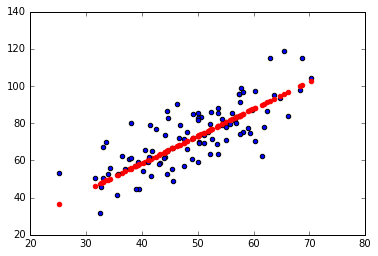

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 89 iterations b = 0.029295389785, m = 1.46328177369, error = 113.259232835


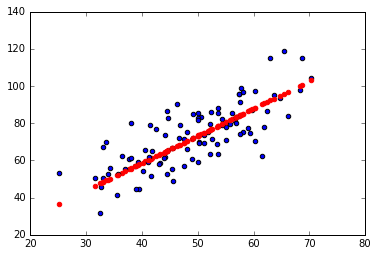

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 90 iterations b = 0.0293167079136, m = 1.46406055622, error = 113.200049566


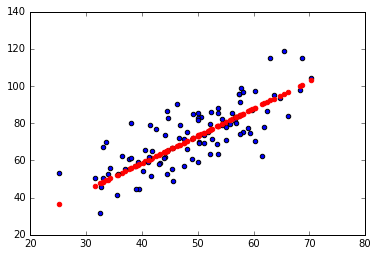

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 91 iterations b = 0.0293372630579, m = 1.46480051952, error = 113.14661815


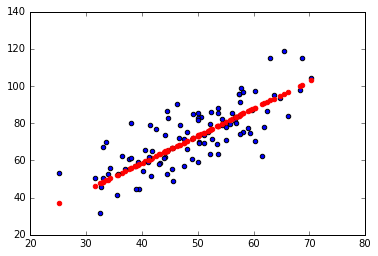

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 92 iterations b = 0.0293570932436, m = 1.46550359831, error = 113.098379546


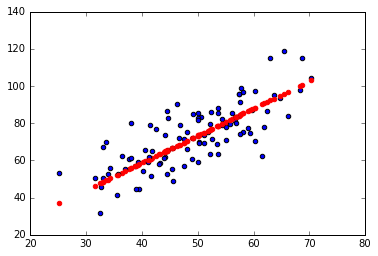

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 93 iterations b = 0.0293762346012, m = 1.46617163084, error = 113.054829048


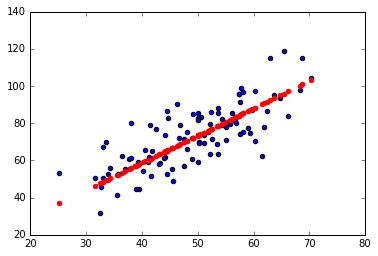

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 94 iterations b = 0.0293947214607, m = 1.46680636376, error = 113.015511006


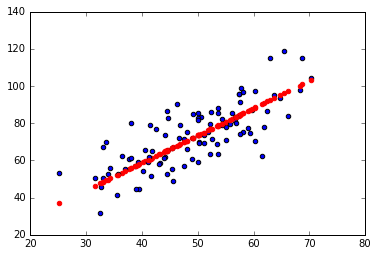

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 95 iterations b = 0.0294125864411, m = 1.46740945668, error = 112.980014054


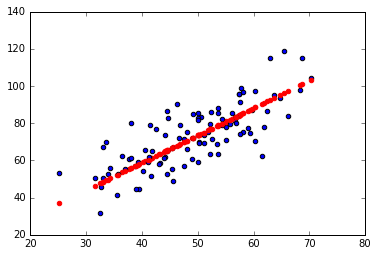

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 96 iterations b = 0.0294298605355, m = 1.46798248648, error = 112.947966808


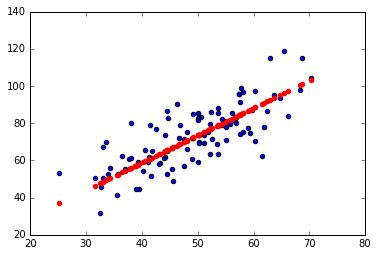

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 97 iterations b = 0.0294465731927, m = 1.46852695147, error = 112.919033981


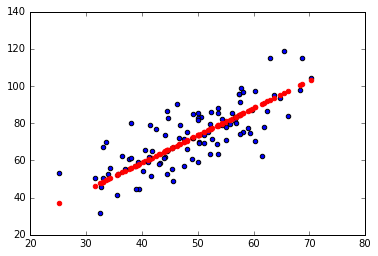

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 98 iterations b = 0.0294627523936, m = 1.46904427528, error = 112.892912873


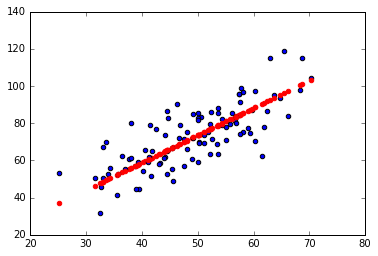

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 99 iterations b = 0.0294784247246, m = 1.46953581057, error = 112.869330205


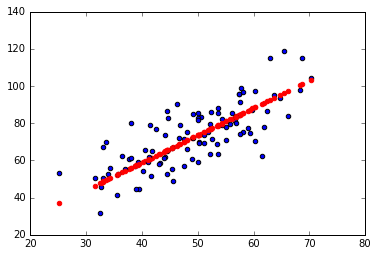

In [17]:
# Use this to visually discuss convergence rate based on learning rate
# learning rate = 0.00001,convergence happens after 80th iteration
#learning rate = 0.0001, convergence happens at around 7th iteration
#learning rate = 0.001, convergence never happens
for num in range(70,100):
    run(num)
    plt.show()



In order for Gradient Descent to work we must set the λ (learning rate) to an appropriate value. This parameter determines how fast or slow we will move towards the optimal weights. If the λ is very large we will skip the optimal solution. If it is too small we will need too many iterations to converge to the best values. So using a good λ is crucial.

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

In [18]:
num_iterations = np.linspace(1,100,100)
print len(num_iterations)

100


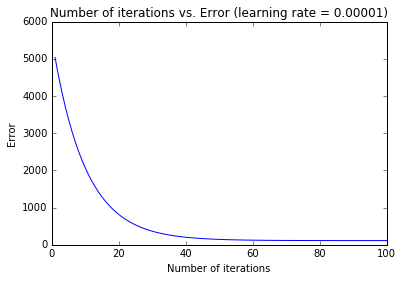

In [19]:
N = 100
num_iterations = np.linspace(1,N,N)
b_current = 0 # initial y-intercept guess
m_current = 0 # initial slope guess
final_error = np.empty(len(num_iterations))

# learning_rate = 0.00001
for i in range(len(num_iterations)):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.00001
    [b_current, m_current] = step_gradient(b_current, m_current, points, learning_rate)
    final_error[i] = compute_error_for_line_given_points(b_current, m_current, points)

plt.plot(num_iterations, final_error)
plt.title('Number of iterations vs. Error (learning rate = 0.00001)')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.show()    

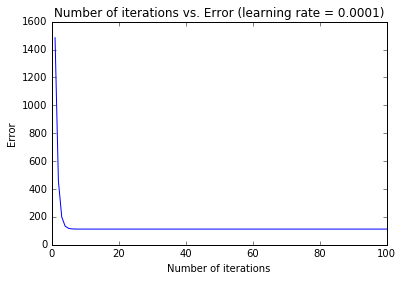

In [20]:
N = 100
num_iterations = np.linspace(1,N,N)
b_current = 0 # initial y-intercept guess
m_current = 0 # initial slope guess
final_error = np.empty(len(num_iterations))

# learning_rate = 0.0001
for i in range(len(num_iterations)):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    [b_current, m_current] = step_gradient(b_current, m_current, points, learning_rate)
    final_error[i] = compute_error_for_line_given_points(b_current, m_current, points)

plt.plot(num_iterations, final_error)
plt.title('Number of iterations vs. Error (learning rate = 0.0001)')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.show()


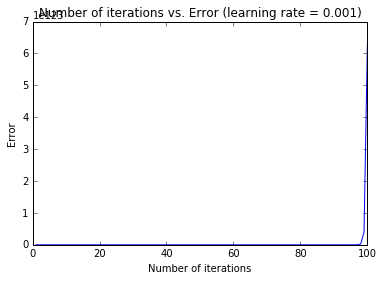

In [21]:
N = 100
num_iterations = np.linspace(1,N,N)
b_current = 0 # initial y-intercept guess
m_current = 0 # initial slope guess
final_error = np.empty(len(num_iterations))

# learning_rate = 0.001
for i in range(len(num_iterations)):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.001
    [b_current, m_current] = step_gradient(b_current, m_current, points, learning_rate)
    final_error[i] = compute_error_for_line_given_points(b_current, m_current, points)

plt.plot(num_iterations, final_error)
plt.title('Number of iterations vs. Error (learning rate = 0.001)')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.show()


$Solution:$

Here, we set the number of iterations is 100 and the learning rates are 0.00001, 0.0001, 0.001. 

From the three plots above, we can observe that, when learning rates are 0.00001 and 0.0001, the error converges, however, when learning rate is too large which reaches 0.001, the error diverges. In addition, when learning rate is 0.0001, the error converges more faster, so finally, we choose 0.0001 as the learning rate.